# Non-Linear Modeling

In this lab, we analyze `Wage` data using various non-linear models.

In [2]:
library(ISLR)
attach(Wage)

The following objects are masked from Wage (pos = 3):

    age, education, health, health_ins, jobclass, logwage, maritl,
    race, region, wage, year



## Polynomial Regression and Step Functions

In [3]:
fit <- lm(wage ~ poly(age, 4), data = Wage)
summary(fit)


Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


The above syntax fits a linear model, using the `lm()` function, in order to predict `wage` using a fourth-degree polynomial in `age`. The `poly()` function allows us to avoid having to write out a long formula with powers of `age`. The function returns a matrix whose columns are a basis of *orthogonal polynomials*, which essentially means that each column is a linear combination of the variables `age`, `age^2`, `age^3`, and `age^4`.  
  
  However, we can also use `poly()` to obtain `age`, `age^2`, `age^3`, and `age^4` directly, if we prefer. We do this by using the `raw = TRUE` argument in the `poly()` function. Later we will see that this does not affect the model in a meaningful way, though the choice of basis clearly affects the coefficient estimates, it does not affect the fitted values obtained.

In [4]:
fit2 <- lm(wage ~ poly(age, 4, raw = TRUE), data = Wage)
summary(fit2)


Call:
lm(formula = wage ~ poly(age, 4, raw = TRUE), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.842e+02  6.004e+01  -3.067 0.002180 ** 
poly(age, 4, raw = TRUE)1  2.125e+01  5.887e+00   3.609 0.000312 ***
poly(age, 4, raw = TRUE)2 -5.639e-01  2.061e-01  -2.736 0.006261 ** 
poly(age, 4, raw = TRUE)3  6.811e-03  3.066e-03   2.221 0.026398 *  
poly(age, 4, raw = TRUE)4 -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


We can alternatively use the following syntax, if we prefer:

In [5]:
fit2a <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

In [6]:
summary(fit2a)


Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.842e+02  6.004e+01  -3.067 0.002180 ** 
age          2.125e+01  5.887e+00   3.609 0.000312 ***
I(age^2)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
I(age^3)     6.811e-03  3.066e-03   2.221 0.026398 *  
I(age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


This simply creates the polynomial basis function on theh fly, making sure to put terms like `age^2` in the wrapper function `I()`, since the `^` symbol has a special meaning in formulas.  
  
  Alternatively, we can use the syntax:

In [7]:
fit2b <- lm(wage ~ cbind(age, age^2, age^3, age^4), data = Wage)
summary(fit2b)


Call:
lm(formula = wage ~ cbind(age, age^2, age^3, age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.842e+02  6.004e+01  -3.067 0.002180 ** 
cbind(age, age^2, age^3, age^4)age  2.125e+01  5.887e+00   3.609 0.000312 ***
cbind(age, age^2, age^3, age^4)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
cbind(age, age^2, age^3, age^4)     6.811e-03  3.066e-03   2.221 0.026398 *  
cbind(age, age^2, age^3, age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


This does the same but a bit more compactly by using the `cbind()` function to build a matrix from a collection of vectors. Any function call such as `cbind()` in a formula also serves as a wrapper.  
  
  We now create a grid of values for `age` at which we want predictions, and then call the generic `predict()` function, specifying that we want standard errors as well.

In [8]:
age.lims <- range(age)
age.grid <- seq(from=age.lims[1], to=age.lims[2])
preds <- predict(fit, newdata=list(age=age.grid), se=TRUE)
se.bands <- cbind(preds$fit + 2*preds$se.fit, preds$fit - 2*preds$se.fit)

Now we plot the data and add the fit from the fourth-degree polynomial.

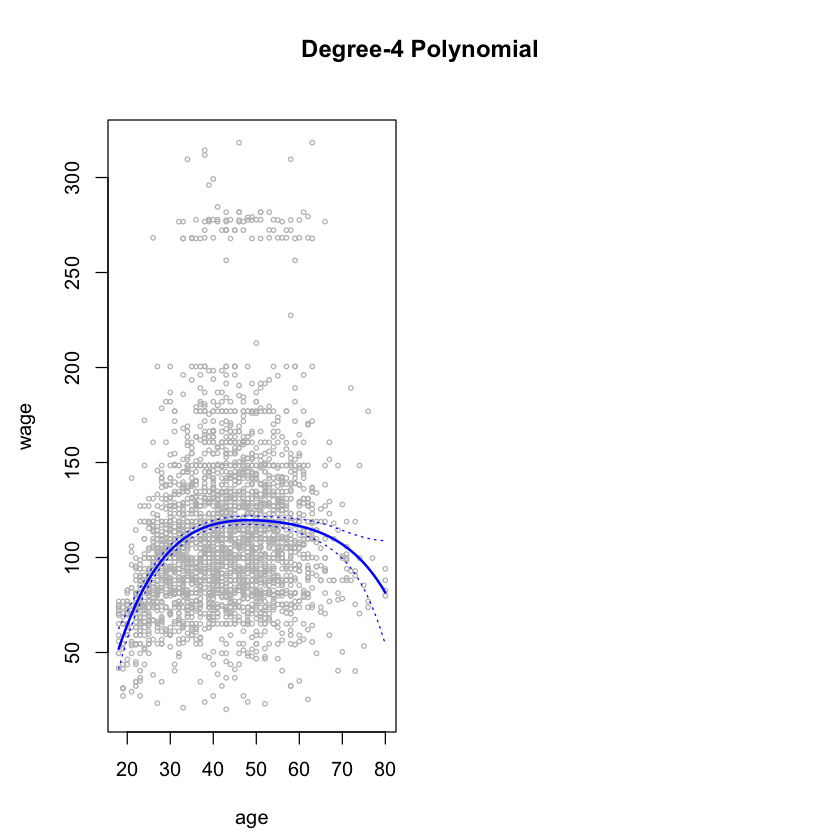

In [9]:
par(mfrow=c(1,2), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(age, wage, xlim=age.lims, cex=0.5, col='grey')
title('Degree-4 Polynomial', outer=TRUE)
lines(age.grid, preds$fit, lwd=2, col='blue')
matlines(age.grid, se.bands, lwd=1, col='blue', lty=3)

Here the arguments `mar` and `oma` in the `par()` function allow us to control the margins of the plot.  
  
  It was mentioned above that whether orr not an orthogonal set of basis functions is produced in the `poly()` function will not affect the model obtained in a meaningful way. Here we see that the fitted values are identical:

In [10]:
preds2 <- predict(fit2, newdata=list(age=age.grid), se=TRUE)
max(abs(preds$fit - preds2$fit))

[1] 1.641354e-12

When performing a polynomial regression, we must decide on the degree of the polynomial to use. One way to do this is by using hypothesis tests. We now fit models ranging from linear to a fifth-degree polynomial and seek to find the simplest model which is sufficient to explain the relationship between `wage` and `age`. We use the `anova()` function, which performs an *analysis of variance* (using an F-test) in order to test the null hypothesis that a model $M_1$ is sufficient to explain the data against the alternative hypothesis that a more complex model $M_2$ is needed. In order to use the `anova()` function, $M_1$ and $M_2$ must be *nested* models. i.e., the predictors in $M_1$ must be a subset of the predictors in $M_2$. In this case, we fit five different models and sequentially compare the simpler model to the more complex model.  


In [10]:
fit.1 <- lm(wage ~ age, data=Wage)
fit.2 <- lm(wage ~ poly(age, 2), data=Wage)
fit.3 <- lm(wage ~ poly(age, 3), data=Wage)
fit.4 <- lm(wage ~ poly(age, 4), data=Wage)
fit.5 <- lm(wage ~ poly(age, 5), data=Wage)

anova(fit.1, fit.2, fit.3, fit.4, fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


We can see in the ANOVA table above, the p-value containing the linear model `fit.1` to the quadratic model `fit.2` is essentially zero, indicating that a linear fit is not sufficient. Similarly, the p-value comparing the quadratic model `fit.2` to the cubic model `fit.3` is also very low (0.0017), so the quadratic fit is also insufficient. The p-value comparing the cubic and degree-4 polynomials, `fit.3` and `fit.4`, is approximately 5%, while the degree-5 polynomial seems unnecessary because its p-value is 0.37. Hence, either a cubic or quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified.  
  
  In this case, instead of using the `anova()` function, we could have obtained these p-values more succinctly by exploiting the fact that `poly()` creates orthogonal polynomials.  
  

In [11]:
summary(fit.5)


Call:
lm(formula = wage ~ poly(age, 5), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.049 -24.386  -5.028  15.344 202.886 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7288 153.278  < 2e-16 ***
poly(age, 5)1  447.0679    39.9161  11.200  < 2e-16 ***
poly(age, 5)2 -478.3158    39.9161 -11.983  < 2e-16 ***
poly(age, 5)3  125.5217    39.9161   3.145  0.00168 ** 
poly(age, 5)4  -77.9112    39.9161  -1.952  0.05105 .  
poly(age, 5)5  -35.8129    39.9161  -0.897  0.36968    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.92 on 2994 degrees of freedom
Multiple R-squared:  0.08651,	Adjusted R-squared:  0.08498 
F-statistic: 56.71 on 5 and 2994 DF,  p-value: < 2.2e-16


Notice that the p-values are essentially the same, and in fact the square of the t-statistics are equal to the F-statistics from the `anova()` function. For example:

In [12]:
(-11.983)^2

[1] 143.5923

However, the ANOVA method works whether or not we used orthogonal polynomials. It also works when we have other terms in the model as well. For example, we can use `anova()` to compare these three models:  


In [13]:
fit.1 <- lm(wage ~ education + age, data=Wage)
fit.2 <- lm(wage ~ education + poly(age, 2, raw=TRUE), data=Wage)
fit.3 <- lm(wage ~ education + poly(age, 3, raw=TRUE), data=Wage)
fit.4 <- lm(wage ~ education + poly(age, 4, raw=TRUE), data=Wage)
fit.5 <- lm(wage ~ education + poly(age, 5, raw=TRUE), data=Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2994,3867992,NA,NA,NA,NA
2993,3725395,1,142597.09701,114.7076992,2.716626e-26
2992,3719809,1,5586.66032,4.4940112,3.409594e-02
2991,3719777,1,31.74108,0.0255331,8.730567e-01
2990,3716972,1,2804.78556,2.2562205,1.331841e-01


As an alternative to hypothesis tests and ANOVA, we could choose the polynomial degree using cross-validation.  
  
  
  Next, we consider the task of predicting whether an individual earns more than $250,000 per year. We proceed much as before, except that first we create the appropriate response vector, and then apply the `glm()` function using `family='binomial'` in order to fit a polynomial logistic regression model.  

In [14]:
fit <- glm(I(wage>250) ~ poly(age, 4), data=Wage, family='binomial')

Notice that we again use the wrapper function `I()` fo create this binary response variable on the fly. The expression `wage>250` evaluates to a logical variable containing `TRUE`s and `FALSE`s, which `glm()` coerces to binary by setting the `TRUE`s to 1 and the `FALSE`s to 0.  
  
  Again, we make predictions using the `predict()` function.

In [15]:
preds <- predict(fit, newdata=list(age=age.grid), se=TRUE)

However, calculating the confidence intervals is slightly more involved than in the linear regression case. The default prediction type for a `glmn()` model is `type='link'`, which is what we use here. This means we get predictions for the logit. That is, we have fit a model of the form  
  
  $$log\left(\frac{Pr(Y=1|X)}{1 - Pr(Y=1|X)}\right) = X\beta,$$  
  
  and the predictions given are of the form $X\hat{\beta}$. The standard errors given are also of this form. In order to obtain confidence intervals for $Pr(Y=1|X)$, we use the transformation  
  
  $$Pr(Y=1|X) = \frac{exp(X\beta)}{1 + exp(X\beta)}$$  
  

In [16]:
pfit <- exp(preds$fit)/(1+exp(preds$fit))
se.bands.logit <- cbind(preds$fit + 2*preds$se.fit, preds$fit - 2*preds$se.fit)
se.bands <- exp(se.bands.logit)/(1+exp(se.bands.logit))

***Important Note:*** We could have directly computed the probabilities by selecting the `type = 'response'` option in the `predict()` function. However, the corresponding confidence intervals wouldn't have been sensible because we would end up with negative probabilities.

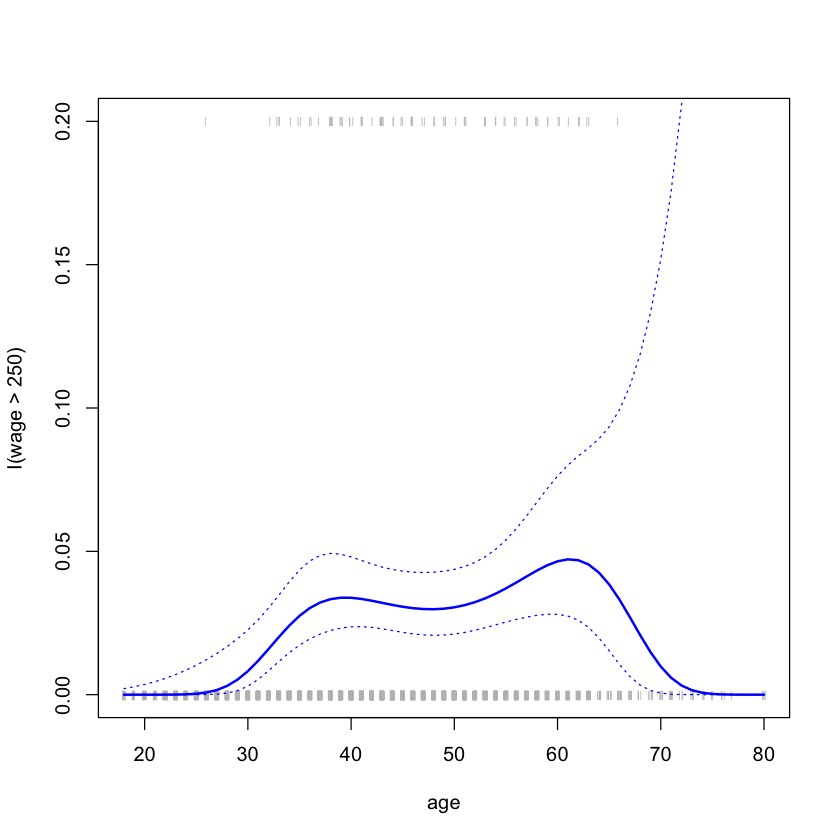

In [17]:
plot(age, I(wage>250), xlim=age.lims, type = 'n', ylim=c(0,0.2))
points(jitter(age), I((wage>250)/5), cex=0.5, pch='|', col='grey')
lines(age.grid, pfit, lwd=2, col='blue')
matlines(age.grid, se.bands, lwd=1, col='blue', lty=3)

We've drawn the `age` values corresponding to the observations with `wage` values above 250 as grey marks on the top, and those with `wage` values below 250 are shown as grey marks on the bottom of the plot. We used the `jitter()` function to jitter the `age` values a bit so that observations with the same `age` value do not cover each other up. This is often called a *rug plot*.  
  


## Step Functions  

In order to fit a step function, we use the `cut()` function.

In [18]:
table(cut(age, 4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [19]:
fit <- lm(wage ~ cut(age, 4), data=Wage)
summary(fit)


Call:
lm(formula = wage ~ cut(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.126 -24.803  -6.177  16.493 200.519 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              94.158      1.476  63.790   <2e-16 ***
cut(age, 4)(33.5,49]     24.053      1.829  13.148   <2e-16 ***
cut(age, 4)(49,64.5]     23.665      2.068  11.443   <2e-16 ***
cut(age, 4)(64.5,80.1]    7.641      4.987   1.532    0.126    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.42 on 2996 degrees of freedom
Multiple R-squared:  0.0625,	Adjusted R-squared:  0.06156 
F-statistic: 66.58 on 3 and 2996 DF,  p-value: < 2.2e-16


Here `cut()` automatically picked the cutpoints at 33.5, 49, and 64.5 years of age. We could also have specified our own cutpoints directly using the `breaks` option. The function `cut()` returns an ordered categorical variable; the `lm()` function then creates a set of dummy variables for use in the regression. The `age<33.5` category is left ouut, so the intercept coefficient of $94,158 can be interpreted as the average salary for those under 33.5 years of age, and the other coefficients can be interpreded as the average additional salary for those in the other age groups. We can produce predictions and plots just as we did in the case of the polynomial fit.  

  
  ##  

## Splines

In order to fit regression splines in `R`, we use the `splines` library. Regression splines can be fit by constructing an appropriate matrix of basis functions. The `bs()` function generates an entire matrix of basis functions for splines with the specified set of knots. By default, cubic splines are produced.  
  
  Fitting `wage` to `age` using a regression spline is simple:

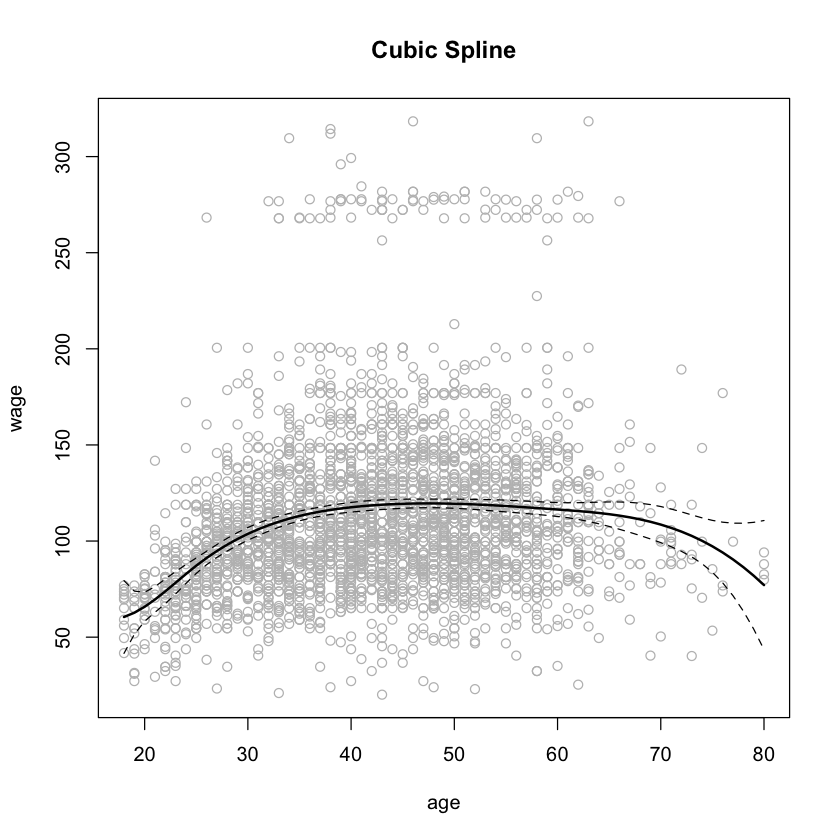

In [34]:
library(splines)

# Fit regression spline
fit <- lm(wage ~ bs(age, knots=c(25, 40, 60)), data=Wage)

# Make predictions
pred <- predict(fit, newdata=list(age=age.grid), se=TRUE)

# Plot our fitted values and 95% confidence bands
plot(age, wage, col='grey')
title('Cubic Spline')
lines(age.grid, pred$fit, lwd=2)
lines(age.grid, pred$fit + 2*pred$se, lty='dashed')
lines(age.grid, pred$fit - 2*pred$se, lty='dashed')

Here we have prespecified knots at ages 25, 40, and 60. This produces a spline with six basis function. We could also use the `df` option to produce a spline with knots at uniform quantiles of the data, based on the specified number of degrees of freedom we choose.

In [35]:
dim(bs(age, knots=c(25, 40, 60)))

[1] 3000    6

In [36]:
dim(bs(age, df=6))

[1] 3000    6

In [37]:
# Adds one extra basis function for each additional knot
dim(bs(age, knots=c(20, 35, 55, 65)))

[1] 3000    7

In [38]:
dim(Wage)

[1] 3000   11

In [39]:
attr(bs(age, df=6), 'knots')

25%   50%   75% 
33.75 42.00 51.00

In this case `R` chooses knots at ages 33.8, 42, and 51, which correspond to the 25th, 50th, and 75th percentiles of `age`. The efunction `bs()` also has a `degree` argument, so we can fit splines of any degree, rather than the default degree of 3 (which yields a cubic spline).  
  
  In order to instead fit a *natural spline*, wee use the `ns()` function. Here we fit a natural spline with four degrees of freedom. As with the `bs()` function, we could instead specify the knots directly using the `knots` option.

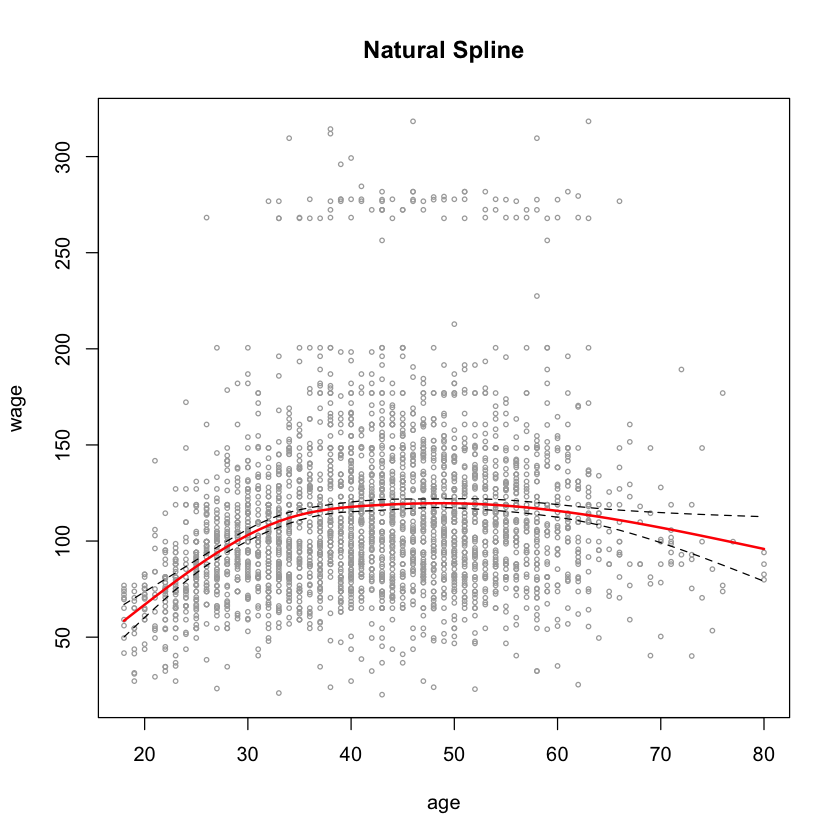

In [40]:
# Fit a natural spline using ns() with 4 degrees of freedom
fit2 <- lm(wage ~ ns(age, df=4), data=Wage)

# Make predictions
pred2 <- predict(fit2, newdata=list(age=age.grid), se=TRUE)

# Plot fitted values
plot(age, wage, xlim=age.lims, cex=0.5, col='darkgrey')
title('Natural Spline')
lines(age.grid, pred2$fit, col='red', lwd=2)
lines(age.grid, pred2$fit + 2*pred2$se, lty='dashed')
lines(age.grid, pred2$fit - 2*pred2$se, lty='dashed')

Notice the narrower confidence bands on the natural spline at the far ends of the data compared to the regular spline.

  
  In order to fit a *smoothing spline*, we use the `smooth.spline()` function:

In [52]:
fit <- smooth.spline(age, wage, df=16)
fit2 <- smooth.spline(age, wage, cv=TRUE)
fit2$df

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

[1] 6.794596

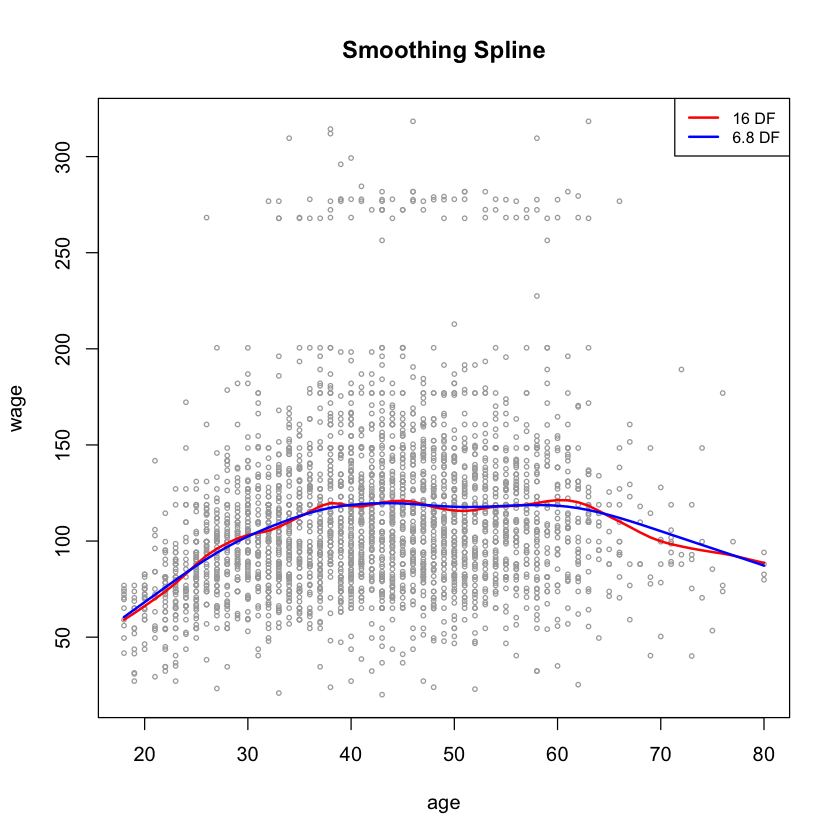

In [53]:
plot(age, wage, xlim=age.lims, cex=0.5, col='darkgrey')
title('Smoothing Spline')
lines(fit, col='red', lwd=2)
lines(fit2, col='blue', lwd=2)
legend('topright', legend = c('16 DF', '6.8 DF'), col=c('red', 'blue'), lty=1, lwd=2, cex=0.8)

Notice that in the first call to `smooth.spline()`, we specified `df=16`. The function then determines which valuee of $\lambda$ leads to 16 degrees of freedom. In the second call to `smooth.spline()`, we select the smoothness level by cross-validation, which resulted in a value of $\lambda$ that yields 6.8 degrees of freedom.  
  
  
  

##  
## Local Regression

In order to perform local regression, we use the `loess()` function.

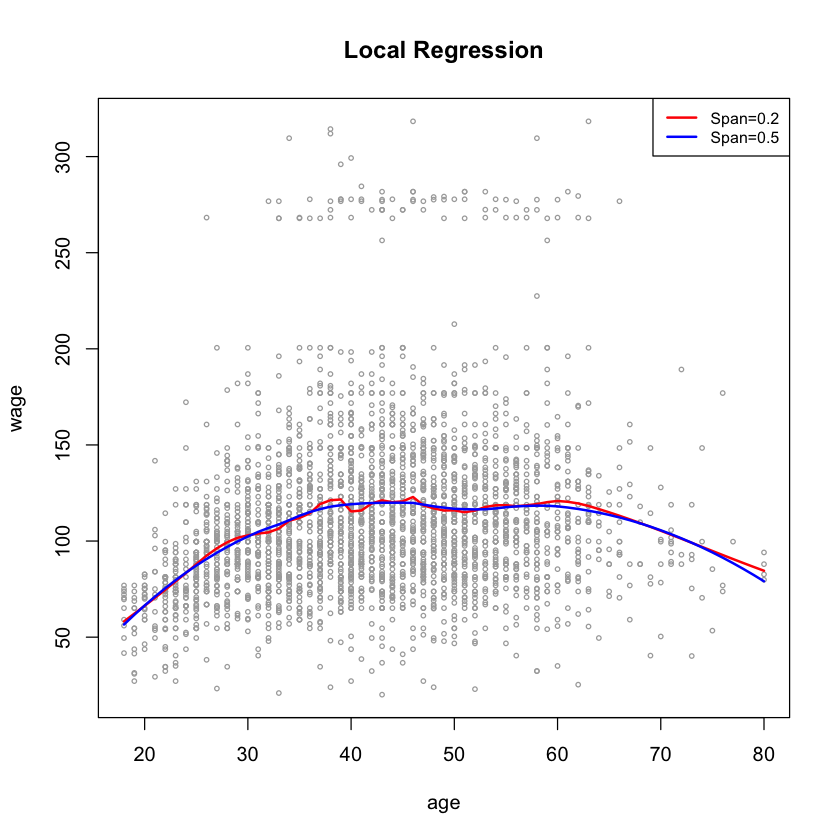

In [66]:
# Fit two models. One using a span of .2 and the other using a span of .5
fit <- loess(wage ~ age, span=0.2, data=Wage)
fit2 <- loess(wage ~ age, span=.5, data=Wage)

# Plot the results of both
plot(age, wage, xlim=age.lims, cex=0.5, col='darkgrey')
title('Local Regression')
lines(age.grid, predict(fit, data.frame(age=age.grid)), col='red', lwd=2)
lines(age.grid, predict(fit2, data.frame(age=age.grid)), col='blue', lwd=2)
legend('topright', legend=c('Span=0.2', 'Span=0.5'), col=c('red', 'blue'), lty=1, lwd=2, cex=0.8)

Here we have performed local linear regression using spans of 0.2 and 0.5: That is, each neighborhood consists of 20% or 50% of the observations. The larger the span, the smoother the fit. The `locfit` library can also be used for fitting local regression models in `R`.

##  
##  Generalized Additive Models

We now fit a GAM to predict `wage` using natural spline functions of `year` and `age`, treating `education` as a qualitative predictor. Since this is just a big linear regression model using an appropriate choice of basis functions, we can simply do this using the `lm()` function:

In [67]:
gam1 <- lm(wage ~ ns(year, 4) + ns(age, 5) + education, data=Wage)

We now fit the model using smoothing splines rather than natural splines. In order to fit more general sorts of GAMs, using smoothing splines or other components that cannot be expressed in terms of basis functions and then fit using least squares regression, we will need to use the `gam` library in `R`.  
  
  The `s()` function, which is part of the `gam` library, is used to indicate that we would like to use a smoothing spline. We specify that the function of `year` should have 4 degrees of freedom, and that the function of `age` will have 5 degrees of freedom. Since `education` is qualitative, we leave it as is, and it is converted into four dummy variables. We use the `gam()` function in order to fit a GAM using these components. All of the terms are fit simultaneously, taking each other into account to explain the response.

In [70]:
#install.packages('gam')
library(gam)
gam.m3 <- gam(wage ~ s(year, 4) + s(age, 5) + education, data=Wage)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: foreach
Loaded gam 1.20



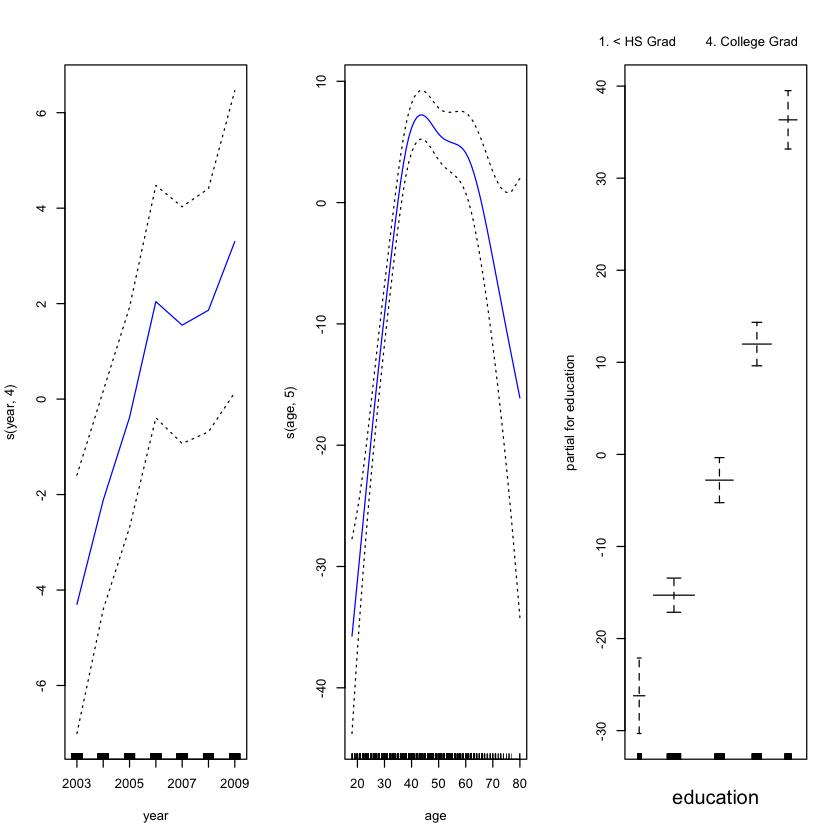

In [71]:
par(mfrow=c(1, 3))
plot(gam.m3, se=TRUE, col='blue')

The generic `plot()` function recognizes that `gam.m3` is an object of class `gam`, and invokes the appropriate `plot.Gam()` function. Conveniently, even though `gam1` is not of the class `gam`, we can still use `plot.Gam()` on it:

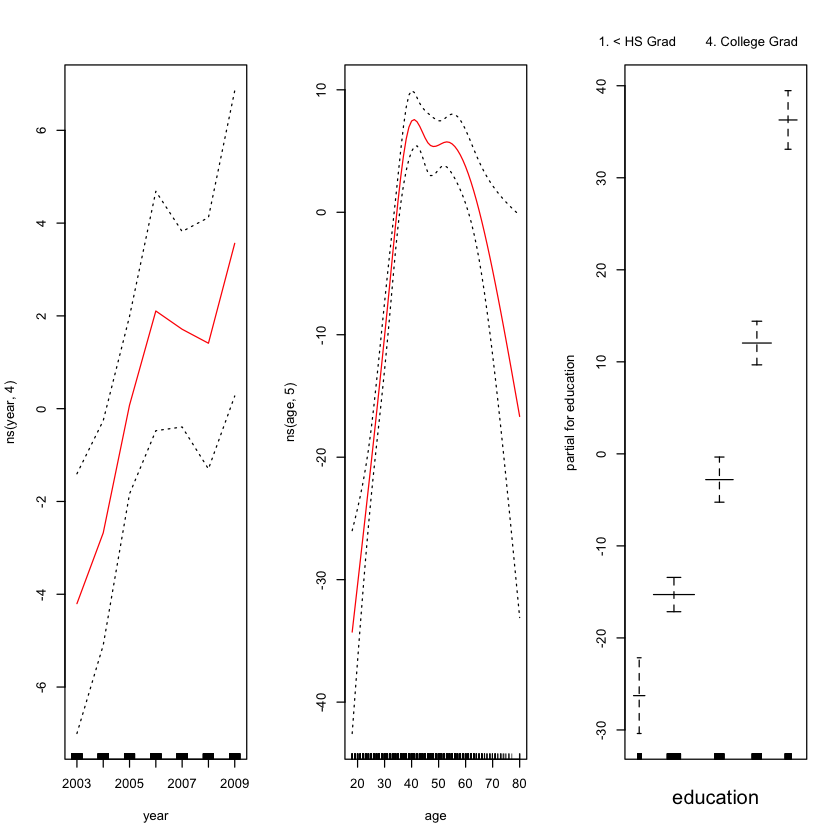

In [78]:
par(mfrow=c(1,3))
plot.Gam(gam1, se=TRUE, col='red')

Note that we had to use `plot.Gam()` rather than the generic `plot()` function here.  
  
  

In these plots, the function of `year` looks fairly linear. We can perform a series of ANOVA tests in order to determine which of these three models is best: a GAM that excludes `year`, a GAM that uses a linear function of `year`, or a GAM that uses a spline function of `year`.

In [79]:
gam.m1 <- gam(wage ~ s(age, 5) + education, data=Wage)
gam.m2 <- gam(wage ~ s(age, 5) + year + education, data=Wage)
anova(gam.m1, gam.m2, gam.m3, test='F')

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2990,3711731,NA,NA,NA,NA
2989,3693842,1.000000,17889.243,14.477130,0.0001447167
2986,3689770,2.999989,4071.134,1.098212,0.3485661430


Surely enough, we find that there is compelling evidence that a GAM with a linear function of `year` is better than a GAM that does not include `year` at all. However, there is no compelling evidence that a non-linear function of `year` is needed (p-val = 0.349). In other words, based on this ANOVA, $M_2$ is preferred.  
  
  The `summary()` function produces a summary of the GAM fit:

In [80]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
--

The p-values for `year` and `age` correspond to a null hypothesis of a linear relationship versus the alternative of a non-linear relationoship. The large p-value for `year` reinforces our conclusion from the ANOVA test that a linear function is adequate for this term. However, there is very clear evidence that a non-linear term is required for `age`.  
  
  We can make predictions from `gam` objects just like we do from `lm` objects, using the e`predict()` method for the class `gam`. Here we make predictions on the training set:

In [81]:
preds <- predict(gam.m2, newdata=Wage)

We can also use local regression fits as building blocks in a GAM, usng the `lo()` function:

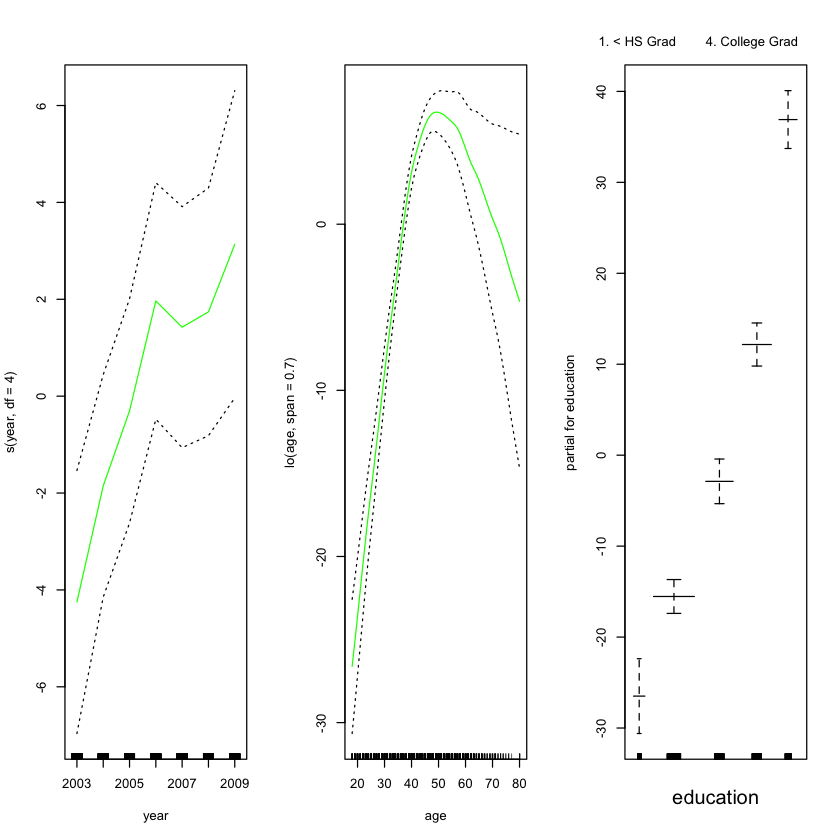

In [83]:
gam.lo <- gam(wage ~ s(year, df=4) + lo(age, span=0.7) + education, data=Wage)
par(mfrow=c(1, 3))
plot.Gam(gam.lo, se=TRUE, col='green')

Here we have used local regression for the `age` term, with a span of 0.7. We can also use the `lo()` function to create interactions before calling the `gam()` function. For example:

In [84]:
gam.lo.i <- gam(wage ~ lo(year, age, span=0.5) + education, data=Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”

fits a two-term model, in which the first term is an interaction between `year` and `age`, fit by a local regression surface. We can plot the resulting two-dimensional surface after installing the `akima` package.

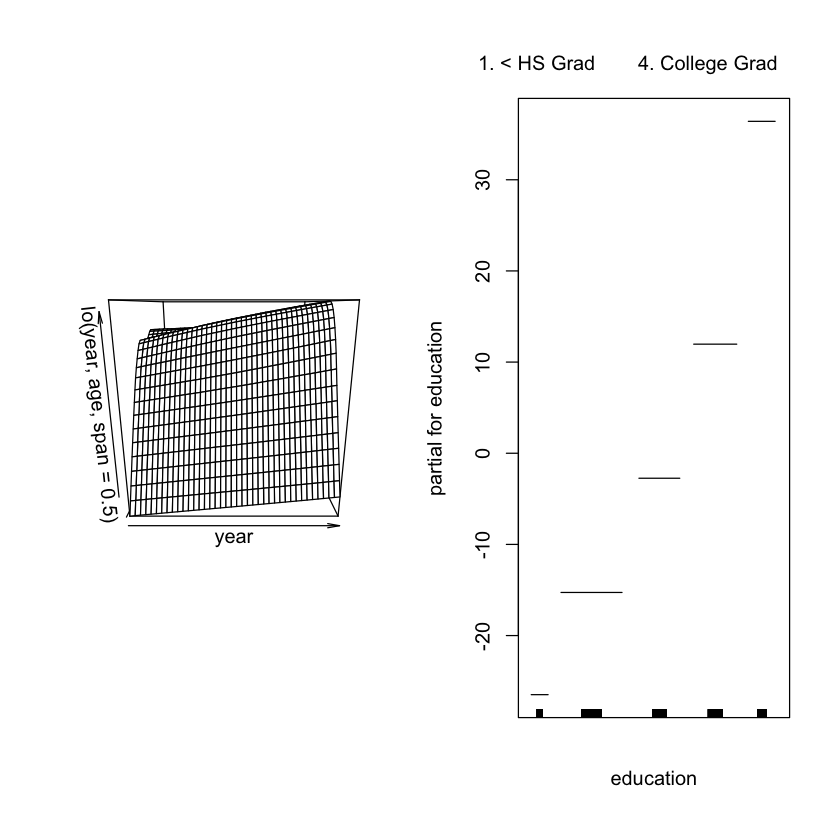

In [87]:
#install.packages('akima')
library(akima)
par(mfrow=c(1,2))
plot(gam.lo.i)

In order to fit a logistic regression GAM, we once again use the `I()` function in constructing the binary response variable, and set `family='binomial'`.

In [88]:
gam.lr <- gam(I(wage>250) ~ year + s(age, df=5) + education, family='binomial', data=Wage)

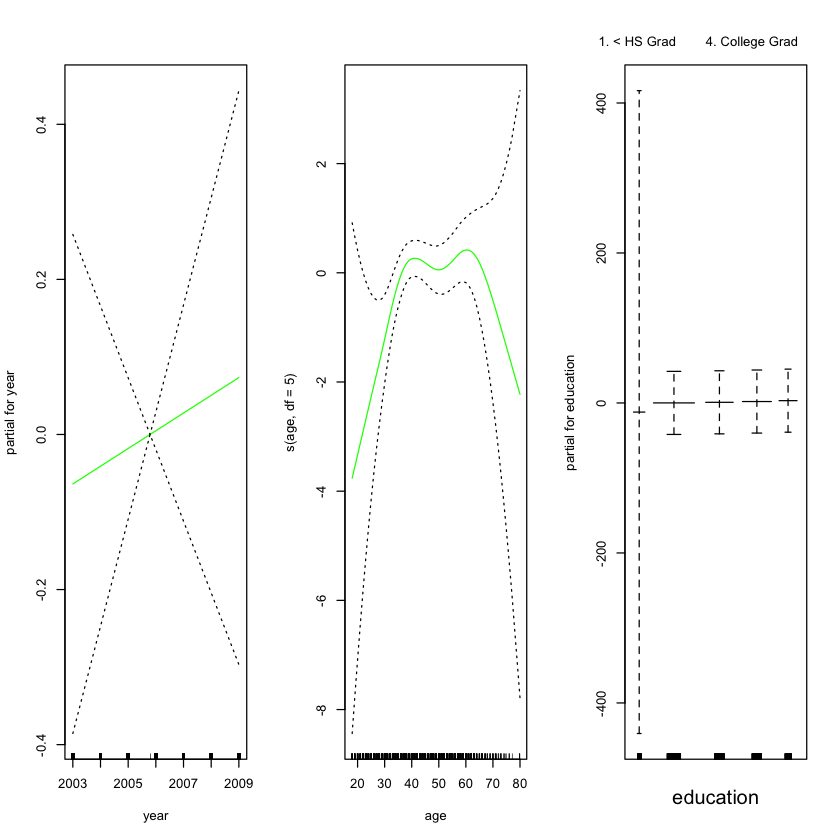

In [89]:
par(mfrow=c(1,3))
plot(gam.lr, se=TRUE, col='green')

It is easy to see that there are no high earners in the `<HS` category:

In [90]:
table(education, I(wage>250))

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

Hence, we fit a logistic regression GAM using all but this category. This provides more sensible results.

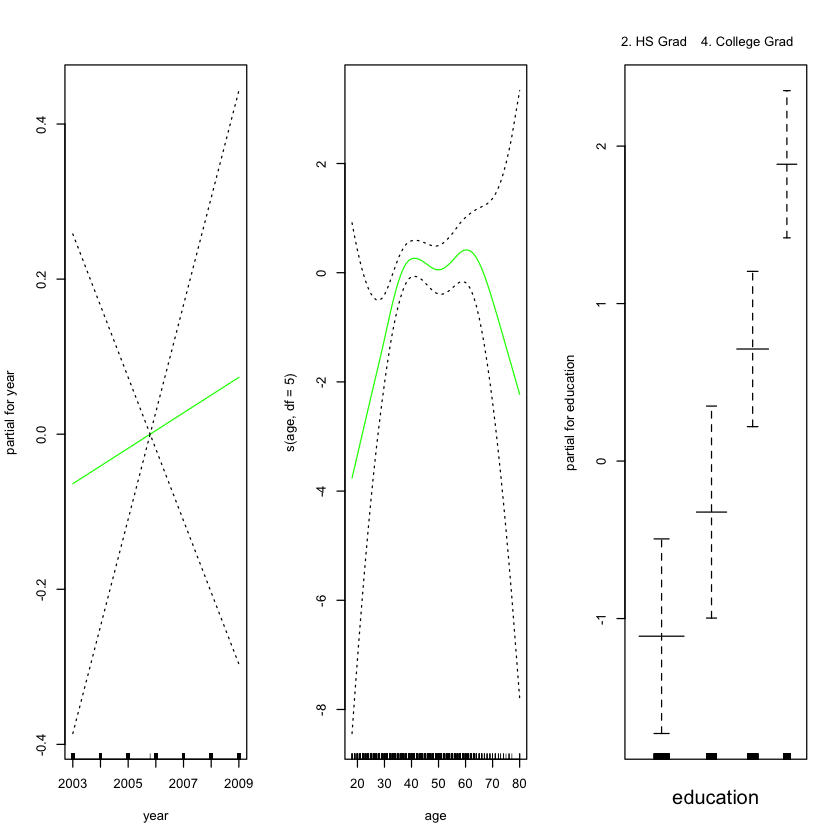

In [91]:
gam.lr.s <- gam(I(wage>250) ~ year + s(age, df=5) + education, family='binomial',
               data=Wage, subset=(education != '1. < HS Grad'))
par(mfrow=c(1, 3))
plot(gam.lr.s, se=TRUE, col='green')